In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import colorcet as cc
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pyarrow

In [2]:
base_path = '../data/'

In [3]:
cluster_dat = gpd.read_file(base_path + 'clustering_data.geojson')

In [4]:
cluster_dat.head()

,geoid,pov_rt,flood_risk,namelsad,NAME,tot_pop_1940,tot_pop_1950,tot_pop_1960,tot_pop_1970,tot_pop_1980,...,deciduous_forest,evergreen_forest,mixed_forest,shrub_scrub,grassland_herbaceous,pasture_hay,cultivated_crops,woody_wetlands,emergent_herbaceous_wetlands,geometry
0,3400100100,0.406424,0.693030,Absecon city,"Absecon city, Atlantic County, New Jersey",2084.0,2355.0,4320.0,6094.0,6859.0,...,0.015168,0.001250,0.028210,0.000915,0.001041,0.002462,0.003178,0.080904,0.251300,"POLYGON ((-74.53138 39.42627, -74.52991 39.425..."
1,3400102080,0.775740,0.971788,Atlantic City city,"Atlantic City city, Atlantic County, New Jersey",64094.0,61657.0,59544.0,47859.0,40199.0,...,0.000101,0.000101,0.000020,0.000525,0.000942,0.000000,0.000000,0.014594,0.311823,"POLYGON ((-74.50159 39.35726, -74.50053 39.356..."
2,3400107810,0.302975,0.966959,Brigantine city,"Brigantine city, Atlantic County, New Jersey",403.0,1267.0,4201.0,6741.0,8318.0,...,0.000928,0.000000,0.000192,0.001503,0.005833,0.000000,0.000832,0.015162,0.287935,"POLYGON ((-74.42199 39.38523, -74.41826 39.381..."
3,3400108680,0.569470,0.181154,Buena borough,"Buena borough, Atlantic County, New Jersey",3111.0,2640.0,3243.0,3283.0,3642.0,...,0.105284,0.003854,0.022989,0.004221,0.004542,0.003341,0.484193,0.061991,0.000315,"POLYGON ((-74.98262 39.51310, -74.97955 39.510..."
4,3400108710,0.449822,0.579928,Buena Vista township,"Buena Vista township, Atlantic County, New Jersey",4067.0,2106.0,3915.0,4239.0,6959.0,...,0.273240,0.023212,0.157290,0.009062,0.008720,0.005383,0.146850,0.223212,0.002444,"POLYGON ((-74.97211 39.50571, -74.97183 39.505..."


In [5]:
cluster_dat.columns

Index(['geoid', 'pov_rt', 'flood_risk', 'namelsad', 'NAME', 'tot_pop_1940',
       'tot_pop_1950', 'tot_pop_1960', 'tot_pop_1970', 'tot_pop_1980',
       'tot_pop_1990', 'tot_pop_2000', 'tot_pop_2010', 'tot_pop_2020',
       'size_class', 'pct_res_vac', 'open_water', 'developed_open_space',
       'developed_low_intensity', 'developed_medium_intensity',
       'developed_high_intensity', 'barren_land_rock_sand_clay',
       'deciduous_forest', 'evergreen_forest', 'mixed_forest', 'shrub_scrub',
       'grassland_herbaceous', 'pasture_hay', 'cultivated_crops',
       'woody_wetlands', 'emergent_herbaceous_wetlands', 'geometry'],
      dtype='object')

<Axes: >

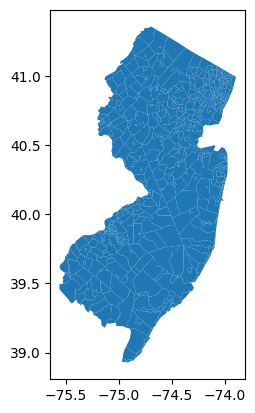

In [6]:
cluster_dat.plot()

In [7]:
# calculate the pct 70 year pop change from tot_pop_1950 and tot_pop_2020
cluster_dat['pct_70_year_pop_change'] = ((cluster_dat['tot_pop_2020'] - cluster_dat['tot_pop_1950']) / cluster_dat['tot_pop_1950']) * 100

In [8]:
# select the following columns: P200_I_PFS, FLD_PFS, pct_thirty_yr_pop_change, geometry
retreat_index_gdf = cluster_dat[['pov_rt', 'flood_risk', 'pct_70_year_pop_change', 'developed_high_intensity', 'tot_pop_2020', 'geometry']]

In [9]:
retreat_index_gdf.head()

,pov_rt,flood_risk,pct_70_year_pop_change,developed_high_intensity,tot_pop_2020,geometry
0,0.406424,0.693030,287.983015,0.024833,9137.0,"POLYGON ((-74.53138 39.42627, -74.52991 39.425..."
1,0.775740,0.971788,-37.562645,0.154158,38497.0,"POLYGON ((-74.50159 39.35726, -74.50053 39.356..."
2,0.302975,0.966959,508.997632,0.058109,7716.0,"POLYGON ((-74.42199 39.38523, -74.41826 39.381..."
3,0.569470,0.181154,70.492424,0.015367,4501.0,"POLYGON ((-74.98262 39.51310, -74.97955 39.510..."
4,0.449822,0.579928,233.950617,0.003296,7033.0,"POLYGON ((-74.97211 39.50571, -74.97183 39.505..."


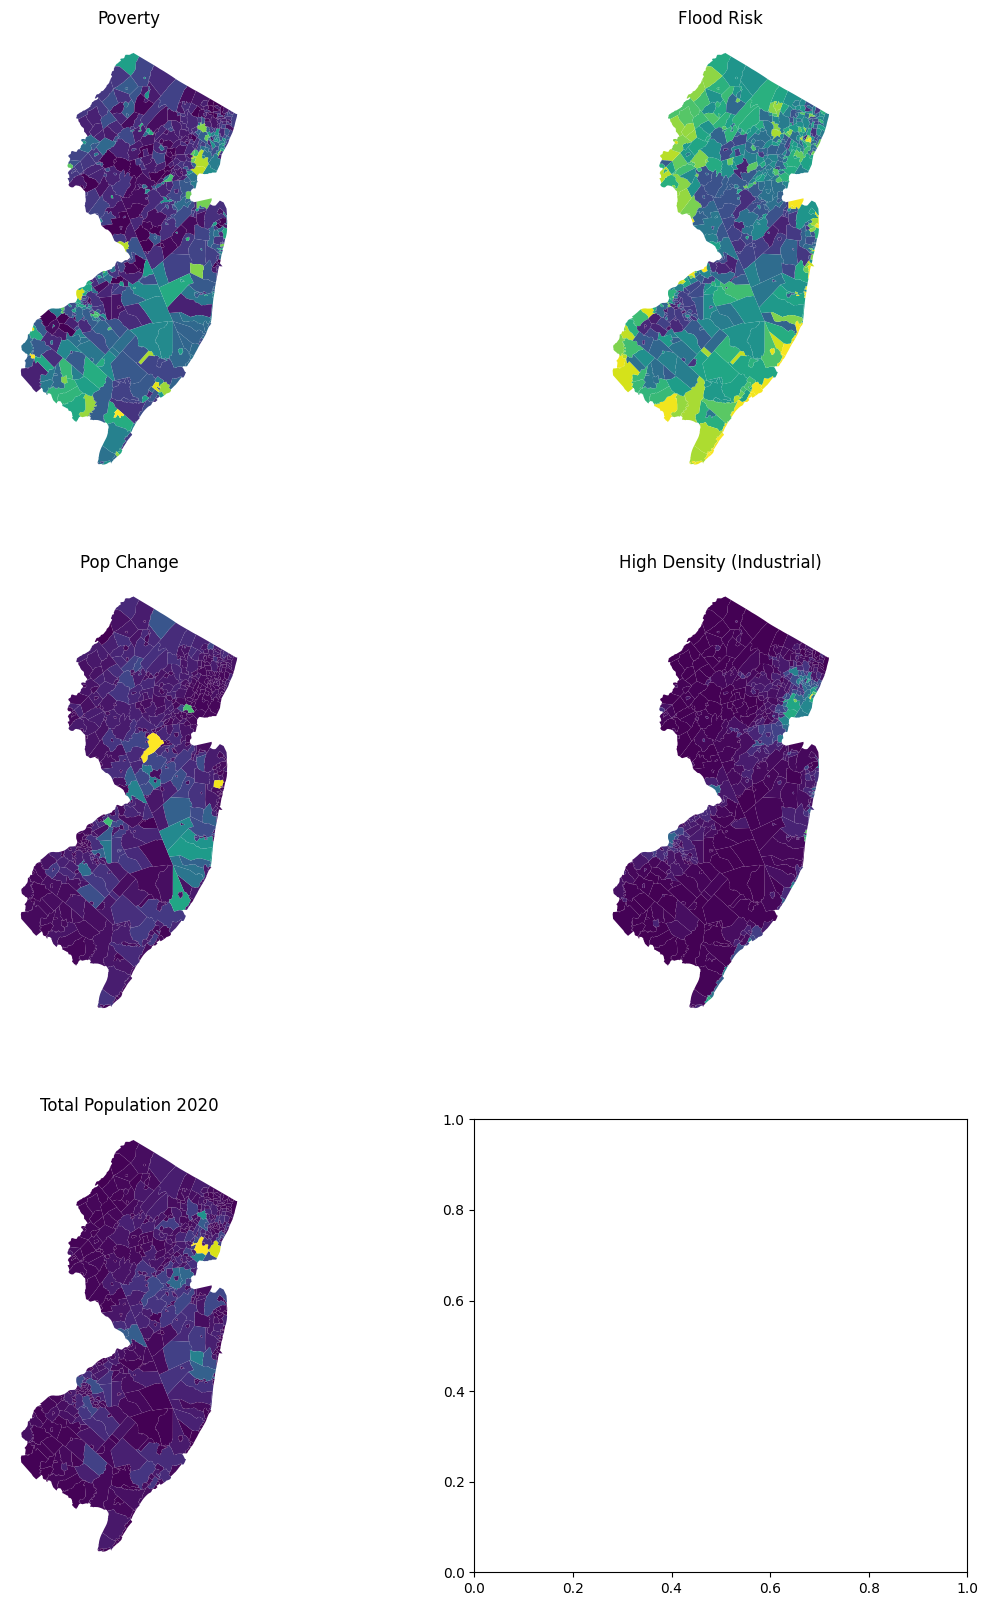

In [10]:
# plot maps of each of the numeric cols in the retreat_index_gdf
fig, ax = plt.subplots(3, 2, figsize=(14, 20))
retreat_index_gdf.plot(column='pov_rt', cmap='viridis', ax=ax[0][0])
ax[0][0].set_title('Poverty')
ax[0][0].axis('off')

retreat_index_gdf.plot(column='flood_risk', cmap='viridis', ax=ax[0][1])
ax[0][1].set_title('Flood Risk')
ax[0][1].axis('off')

retreat_index_gdf.plot(column='pct_70_year_pop_change', cmap='viridis', ax=ax[1][0])
ax[1][0].set_title('Pop Change')
ax[1][0].axis('off')

retreat_index_gdf.plot(column='developed_high_intensity', cmap='viridis', ax=ax[1][1])
ax[1][1].set_title('High Density (Industrial)')
ax[1][1].axis('off')

retreat_index_gdf.plot(column='tot_pop_2020', cmap='viridis', ax=ax[2][0])
ax[2][0].set_title('Total Population 2020')
ax[2][0].axis('off')

plt.show()

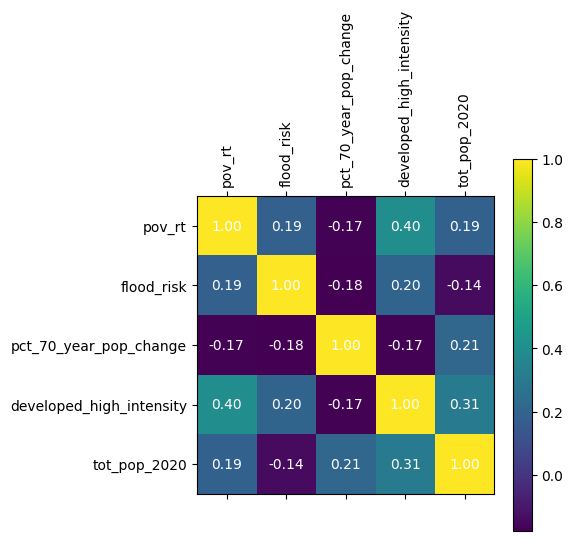

In [11]:
# Exclude non-numeric columns
numeric_cols = retreat_index_gdf.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr = retreat_index_gdf[numeric_cols].corr()

# Plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

# Add correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

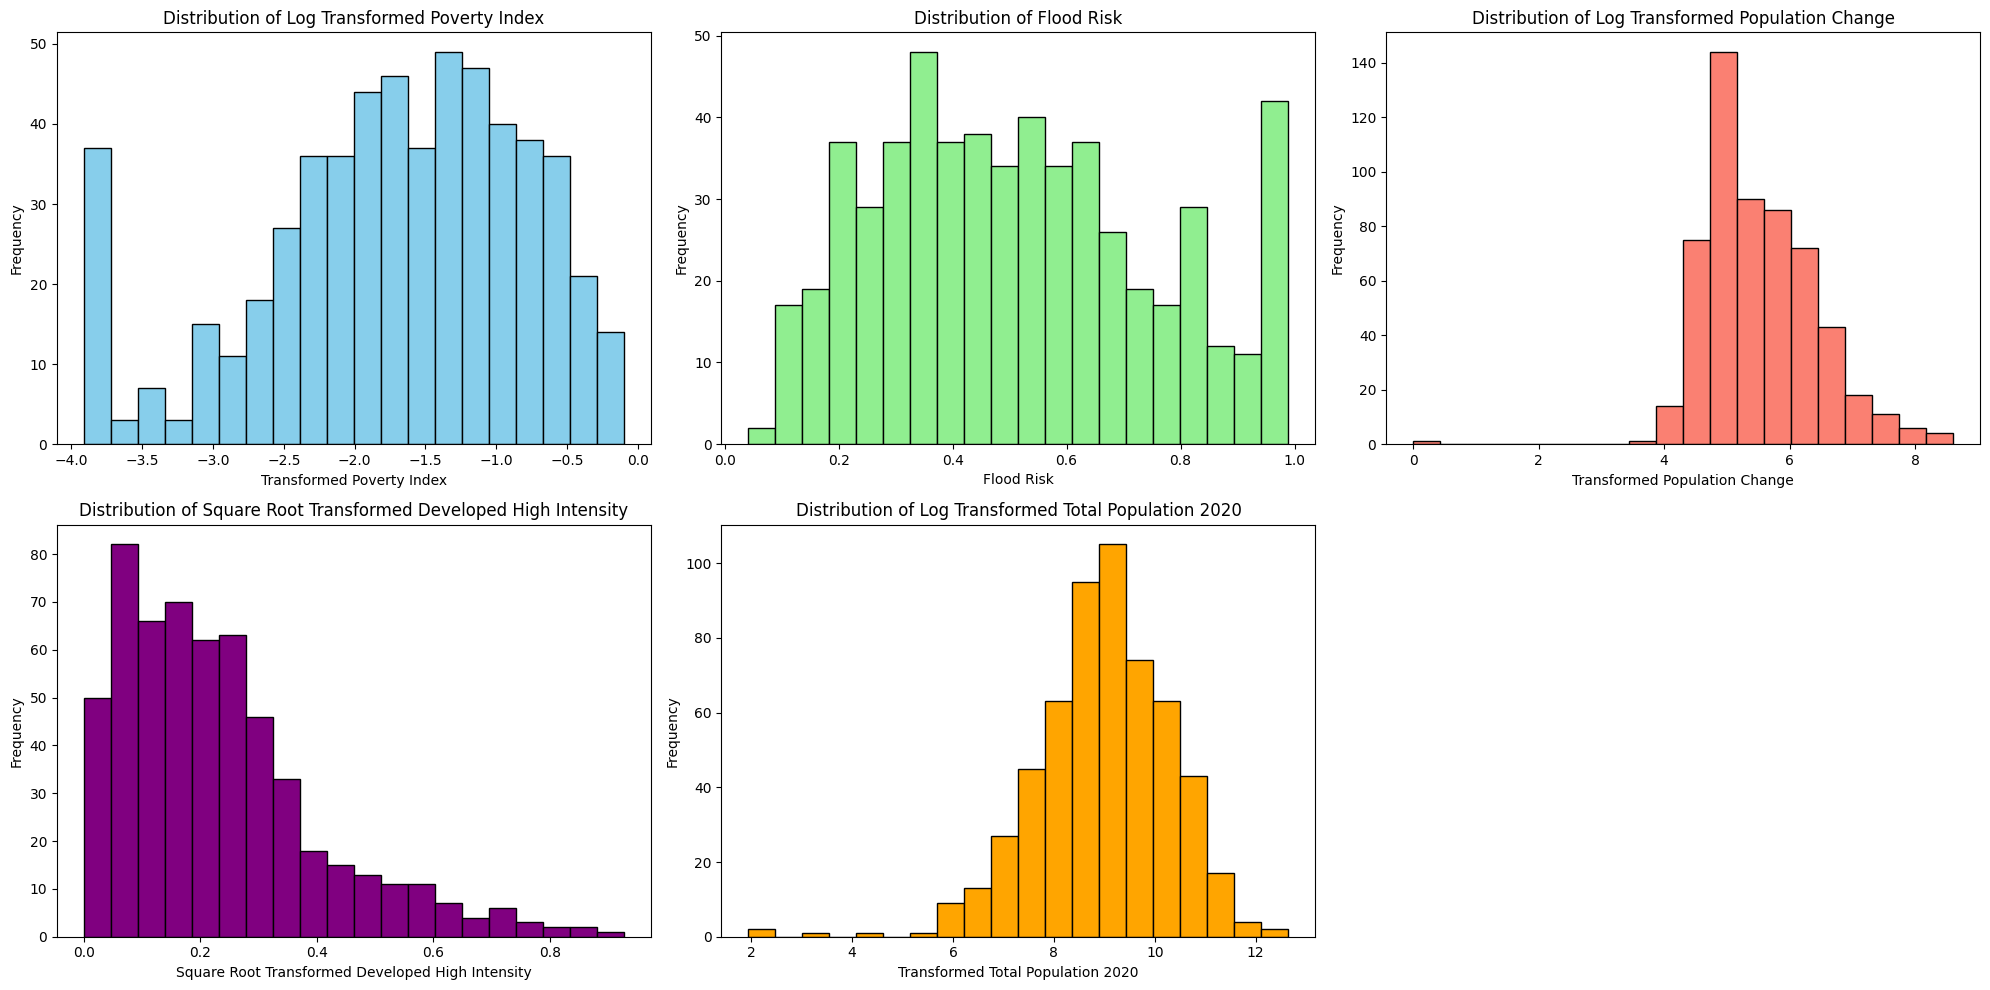

In [12]:
# Histograms for the four variables
plt.figure(figsize=(20, 10))

# Function to apply log transformation
def log_transform(column):
    if (column <= 0).any():
        min_value = column.min()
        shift_constant = np.abs(min_value) + 1
        return np.log(column + shift_constant)
    else:
        return np.log(column)

# Histogram for Poverty Index
plt.subplot(2, 3, 1)
transformed_pov_rt = log_transform(retreat_index_gdf['pov_rt'])
plt.hist(transformed_pov_rt, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Transformed Poverty Index')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Poverty Index')

# Histogram for Flood Risk
plt.subplot(2, 3, 2)
plt.hist(retreat_index_gdf['flood_risk'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Flood Risk')
plt.ylabel('Frequency')
plt.title('Distribution of Flood Risk')

# Histogram for Population Change
plt.subplot(2, 3, 3)
transformed_pop_change = log_transform(retreat_index_gdf['pct_70_year_pop_change'])
plt.hist(transformed_pop_change, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Transformed Population Change')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Population Change')

# Histogram for Developed High Intensity
plt.subplot(2, 3, 4)
transformed_developed_high_intensity = np.sqrt(retreat_index_gdf['developed_high_intensity'])
plt.hist(transformed_developed_high_intensity, bins=20, color='purple', edgecolor='black')
plt.xlabel('Square Root Transformed Developed High Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Square Root Transformed Developed High Intensity')


# Histogram for Total Population
plt.subplot(2, 3, 5)
transformed_tot_pop_2020 = log_transform(retreat_index_gdf['tot_pop_2020'])
plt.hist(transformed_tot_pop_2020, bins=20, color='orange', edgecolor='black')
plt.xlabel('Transformed Total Population 2020')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Total Population 2020')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Step 1: Apply transformations
retreat_index_gdf['log_pov_rt'] = np.log(retreat_index_gdf['pov_rt'])
retreat_index_gdf['log_tot_pop_2020'] = np.log(retreat_index_gdf['tot_pop_2020'])
retreat_index_gdf['sqrt_flood_risk'] = np.sqrt(retreat_index_gdf['flood_risk'])
retreat_index_gdf['squared_developed_high_intensity'] = retreat_index_gdf['developed_high_intensity'] ** 2

# Step 2: Z-score normalize the variables
scaler = StandardScaler()
variables_to_normalize = ['log_pov_rt', 'sqrt_flood_risk', 'pct_70_year_pop_change', 'squared_developed_high_intensity', 'log_tot_pop_2020']
# Drop NA values from the dataframe to avoid errors in scaling and clustering
cleaned_gdf = retreat_index_gdf.dropna(subset=variables_to_normalize)
normalized_data = scaler.fit_transform(cleaned_gdf[variables_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=variables_to_normalize, index=cleaned_gdf.index)

c:\Users\Nissim\Documents\GitHub\mach-superstudio\.venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Nissim\Documents\GitHub\mach-superstudio\.venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Nissim\Documents\GitHub\mach-superstudio\.venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is tr

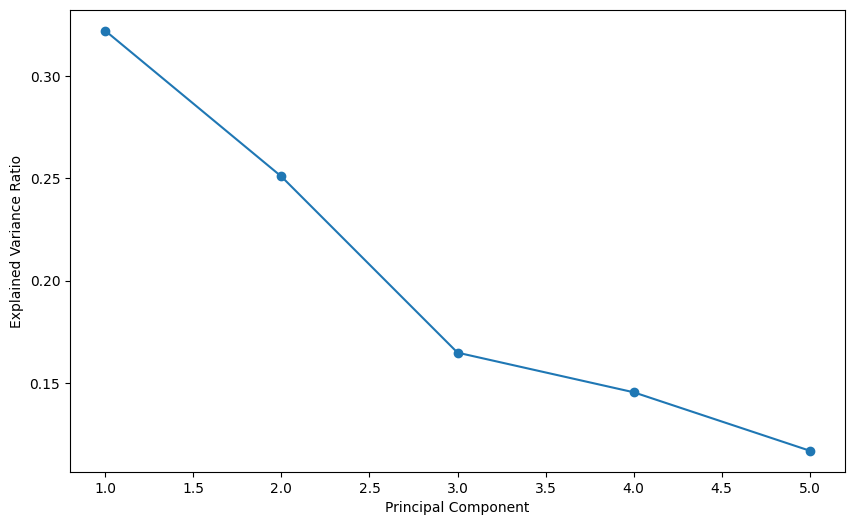

In [14]:
# run PCA on the normalized data to show which variables are most important
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(normalized_df)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.show()

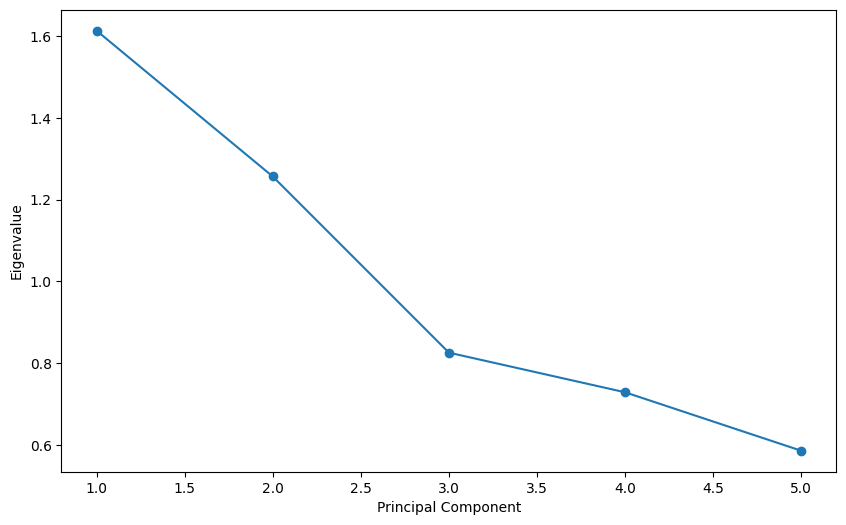

In [15]:
# show the eigenvalues of each componnet

plt.figure(figsize=(10, 6))

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

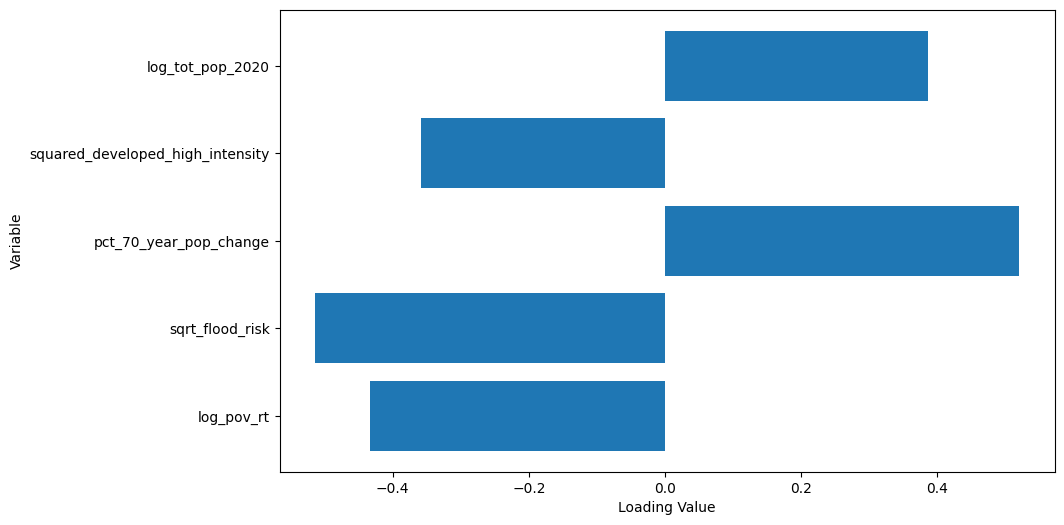

In [16]:
# show which variables are most important in each component
# Create a DataFrame with the loadings

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(pca.components_) + 1)], index=variables_to_normalize)

# Plot the loadings
plt.figure(figsize=(10, 6))

plt.barh(loadings.index, loadings['PC1'])
plt.xlabel('Loading Value')
plt.ylabel('Variable')

plt.show()

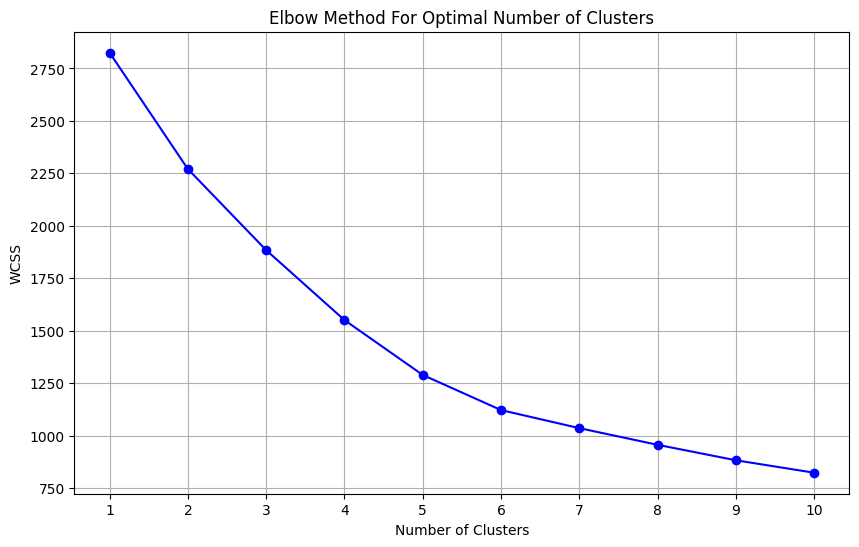

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Compute WCSS for different numbers of clusters
wcss = []  # List to store WCSS values
cluster_range = range(1, 11)  # Adjust the range as needed

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_df)  # Assuming 'normalized_df' is your pre-processed data
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Step 2: Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [18]:
# Step 3: Cluster the normalized and cleaned data
kmeans = KMeans(n_clusters=7, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(normalized_df)

In [19]:
cleaned_gdf['cluster'] = clusters  # Add cluster labels to the cleaned GeoDataFrame

In [20]:
# Step 4: Map the clusters
# Ensure the GeoDataFrame for plotting includes the cluster information
retreat_index_gdf = retreat_index_gdf.merge(cleaned_gdf[['cluster']], left_index=True, right_index=True, how='left')

In [21]:
retreat_index_gdf.head()

,pov_rt,flood_risk,pct_70_year_pop_change,developed_high_intensity,tot_pop_2020,geometry,log_pov_rt,log_tot_pop_2020,sqrt_flood_risk,squared_developed_high_intensity,cluster
0,0.406424,0.693030,287.983015,0.024833,9137.0,"POLYGON ((-74.53138 39.42627, -74.52991 39.425...",-0.900360,9.120087,0.832484,0.000617,2
1,0.775740,0.971788,-37.562645,0.154158,38497.0,"POLYGON ((-74.50159 39.35726, -74.50053 39.356...",-0.253938,10.558336,0.985793,0.023765,2
2,0.302975,0.966959,508.997632,0.058109,7716.0,"POLYGON ((-74.42199 39.38523, -74.41826 39.381...",-1.194105,8.951051,0.983341,0.003377,2
3,0.569470,0.181154,70.492424,0.015367,4501.0,"POLYGON ((-74.98262 39.51310, -74.97955 39.510...",-0.563049,8.412055,0.425622,0.000236,5
4,0.449822,0.579928,233.950617,0.003296,7033.0,"POLYGON ((-74.97211 39.50571, -74.97183 39.505...",-0.798903,8.858369,0.761530,0.000011,5


In [22]:
retreat_index_gdf.columns

Index(['pov_rt', 'flood_risk', 'pct_70_year_pop_change',
       'developed_high_intensity', 'tot_pop_2020', 'geometry', 'log_pov_rt',
       'log_tot_pop_2020', 'sqrt_flood_risk',
       'squared_developed_high_intensity', 'cluster'],
      dtype='object')

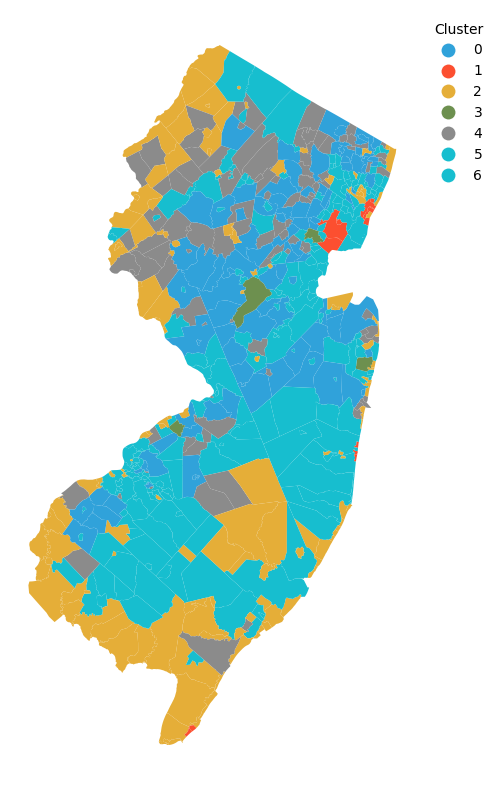

In [23]:
# Select a colorcet palette and create a ListedColormap
colors = cc.glasbey_hv[:6]  # For 7 clusters
cmap = ListedColormap(colors)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
retreat_index_gdf.plot(column='cluster', cmap=cmap, legend=True, ax=ax, categorical=True)

# Adjusting the legend to be outside
legend = ax.get_legend()
if legend:
    legend.set_bbox_to_anchor((1.2, 1))  # Move the legend further right
    legend.set_title('Cluster')
    legend.set_frame_on(False)  # Remove the frame of the legend

# Remove the frame, ticks, and labels
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to leave space for the legend
plt.show()


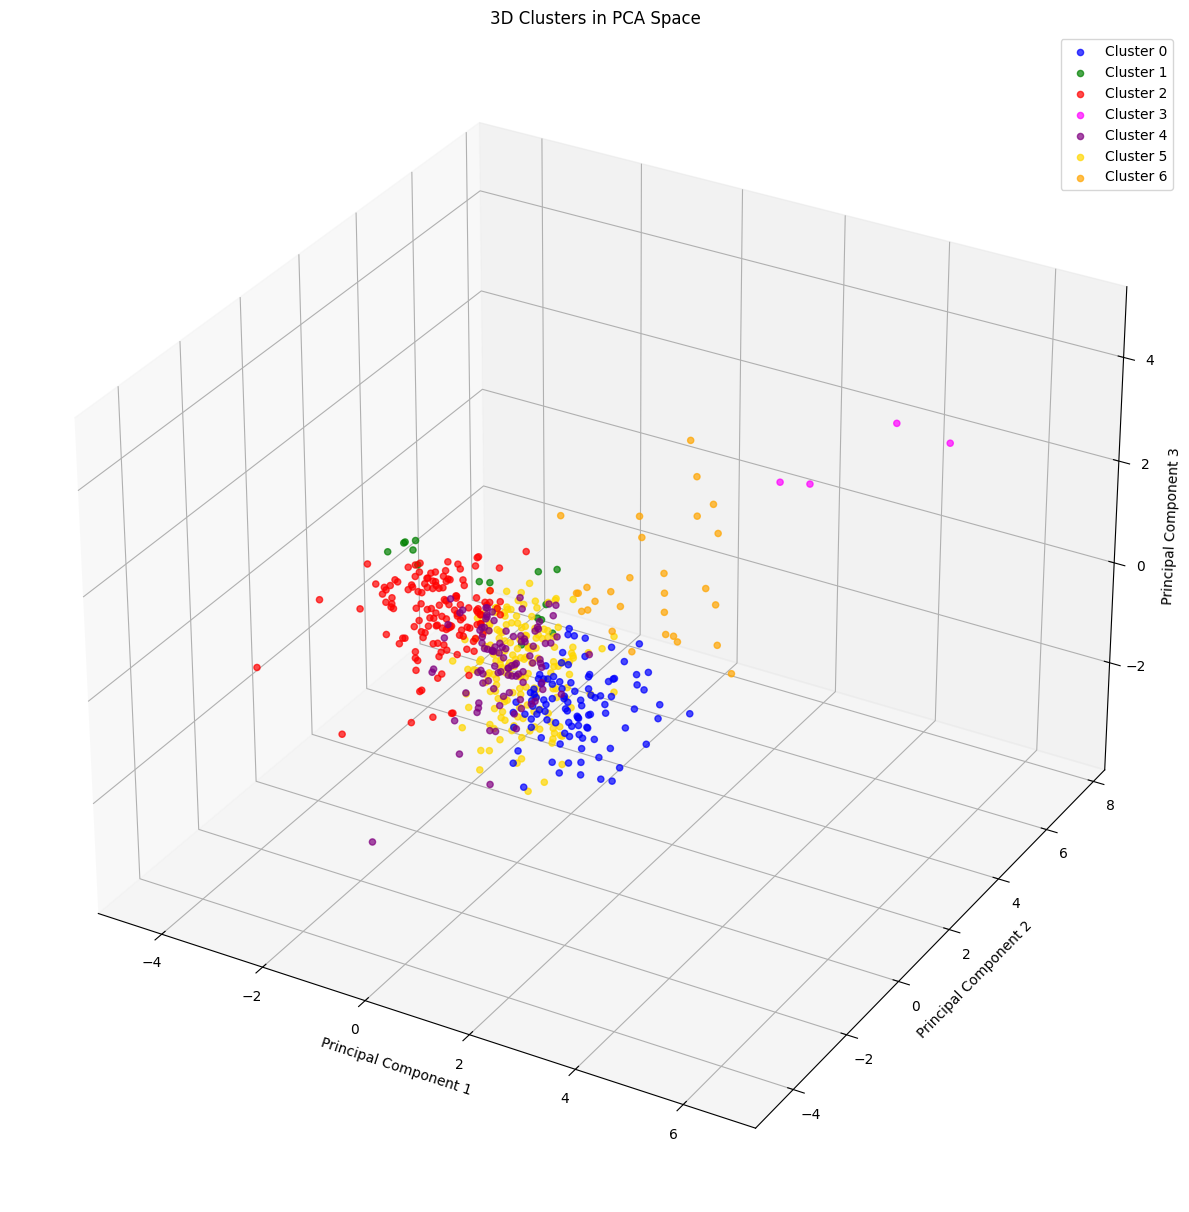

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Apply PCA for 3 components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(normalized_df)

# Step 2: Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=cleaned_gdf.index)

# Step 3: Merge the PCA data with the cluster labels
pca_df = pca_df.merge(cleaned_gdf[['cluster']], left_index=True, right_index=True, how='left')

# Step 4: Plot the clusters in 3D, with custom colors
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

# Define a color list, changing the color for cluster 5
colors = ['blue', 'green', 'red', 'magenta', 'purple', 'gold', 'orange', 'lightblue']

# Sort the clusters
sorted_clusters = sorted(pca_df['cluster'].unique())

for cluster in sorted_clusters:
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    # Use modulo to avoid index errors if there are more clusters than colors
    color = colors[cluster % len(colors)]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', color=color, alpha=0.7)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters in PCA Space')
ax.legend()

# Adjust layout to prevent clipping
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()

plt.show()

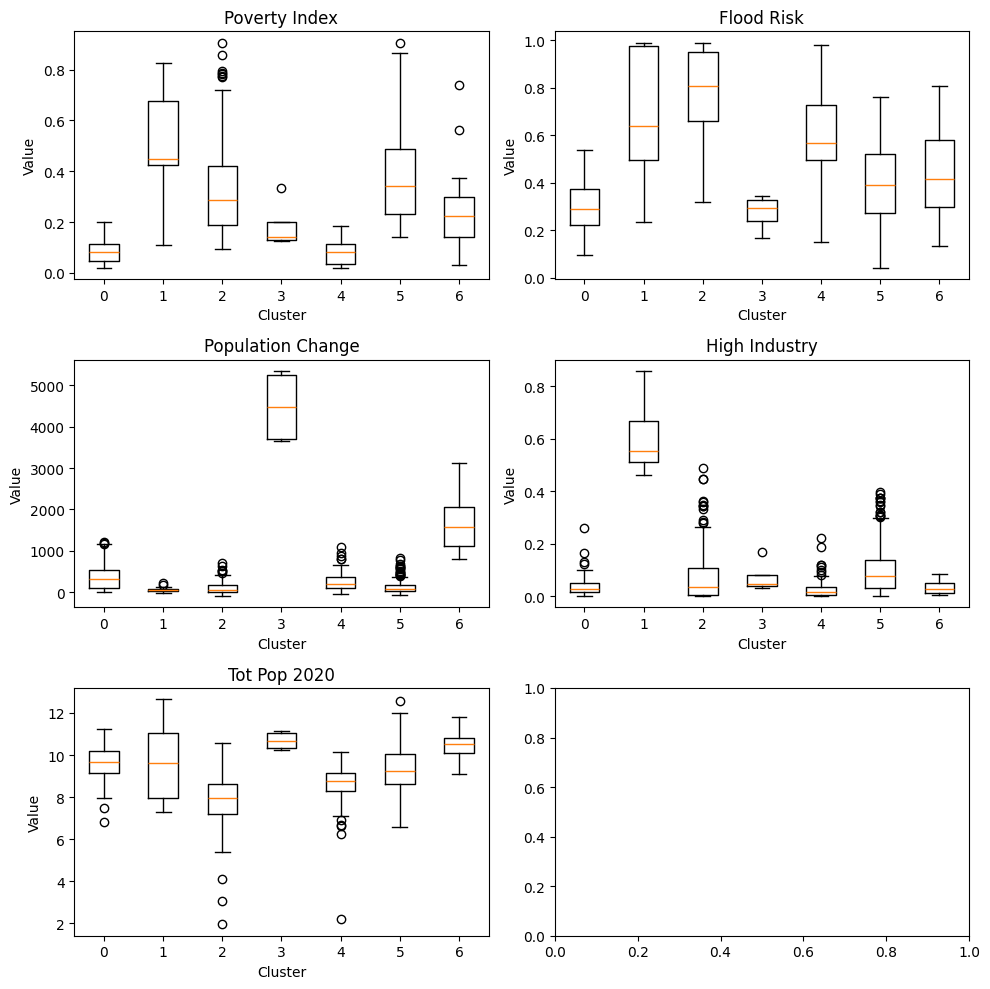

In [97]:
# Variables to plot
variables = ['pov_rt', 'flood_risk', 'pct_70_year_pop_change', 'developed_high_intensity', 'log_tot_pop_2020']
titles = ['Poverty Index', 'Flood Risk', 'Population Change', 'High Industry', 'Tot Pop 2020']

# Creating box plots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axes array and iterate over it
for ax, var, title in zip(axes.flatten(), variables, titles):

    # Prepare data for plotting: extract values for each cluster
    data_to_plot = [retreat_index_gdf[retreat_index_gdf['cluster'] == cluster][var] for cluster in sorted(retreat_index_gdf['cluster'].unique())]
    
    # Create box plot
    ax.boxplot(data_to_plot)
    
    # Setting titles and labels
    ax.set_title(title)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Value')
    ax.set_xticklabels(sorted(retreat_index_gdf['cluster'].unique()))

plt.tight_layout()
plt.show()


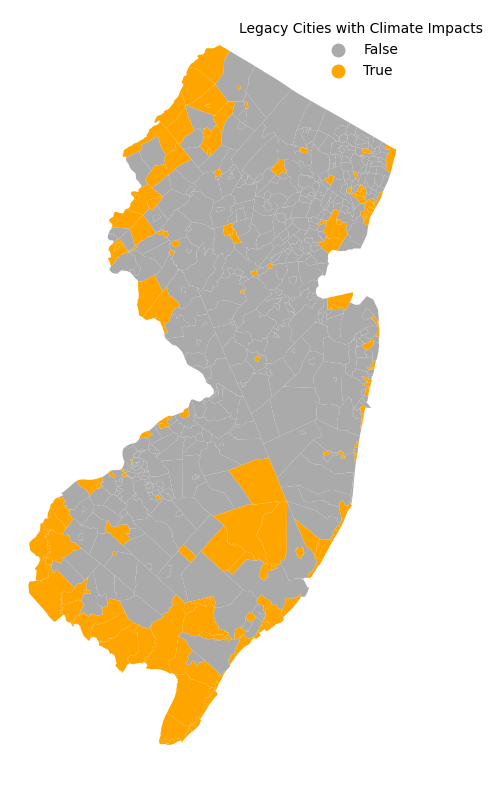

In [104]:
# Create a new column 'highlight' that is True for clusters 2 and 3, and False otherwise
retreat_index_gdf['highlight'] = retreat_index_gdf['cluster'].isin([1, 2])

# Create a color map for the highlight: use bright colors for True (clusters 2 and 3) and a dull color for False
highlight_cmap = ListedColormap(['#aaaaaa', '#ff0000', 'orange'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
retreat_index_gdf.plot(column='highlight', cmap=highlight_cmap, legend=True, ax=ax, categorical=True)

# Adjusting the legend to be outside
legend = ax.get_legend()
if legend:
    legend.set_bbox_to_anchor((1.2, 1))  # Move the legend further right
    legend.set_title('Legacy Cities with Climate Impacts')
    legend.set_frame_on(False)  # Remove the frame of the legend

# Remove the frame, ticks, and labels
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to leave space for the legend
plt.show()

In [99]:
# read the nj_cest from a geoparquet file
nj_cejst = gpd.read_parquet(base_path + 'nj_cejst.parquet')

In [100]:
nj_cejst.head()

,GEOID10,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,...,AGE_10,AGE_MIDDLE,AGE_OLD,TA_COU_116,TA_COUNT_C,TA_PERC,TA_PERC_FE,UI_EXP,THRHLD,geometry
40677,34015501210,New Jersey,Gloucester County,NaN,NaN,NaN,0.43,0.38,0.30,0.36,...,0.12,0.73,0.13,NaN,None,NaN,NaN,Nation,21,"POLYGON ((-75.08790 39.71565, -75.08840 39.715..."
40678,34015501301,New Jersey,Gloucester County,NaN,NaN,NaN,0.54,0.44,0.20,0.36,...,0.07,0.76,0.16,NaN,None,NaN,NaN,Nation,21,"POLYGON ((-75.11347 39.73927, -75.11351 39.739..."
40679,34015501303,New Jersey,Gloucester County,NaN,NaN,NaN,0.54,0.61,0.34,0.39,...,0.08,0.66,0.24,NaN,None,NaN,NaN,Nation,21,"POLYGON ((-75.13190 39.72464, -75.13088 39.723..."
40680,34015501900,New Jersey,Gloucester County,NaN,NaN,NaN,0.40,0.63,0.67,0.39,...,0.07,0.76,0.16,NaN,None,NaN,NaN,Nation,21,"POLYGON ((-75.19511 39.66308, -75.19538 39.663..."
40681,34015500300,New Jersey,Gloucester County,NaN,NaN,NaN,0.80,0.57,0.50,0.74,...,0.10,0.76,0.13,NaN,None,NaN,NaN,Nation,21,"POLYGON ((-75.19502 39.87752, -75.19471 39.877..."


C:\Users\Nissim\AppData\Local\Temp\ipykernel_26408\1970897904.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 3)  # Get 3 distinct colors from viridis


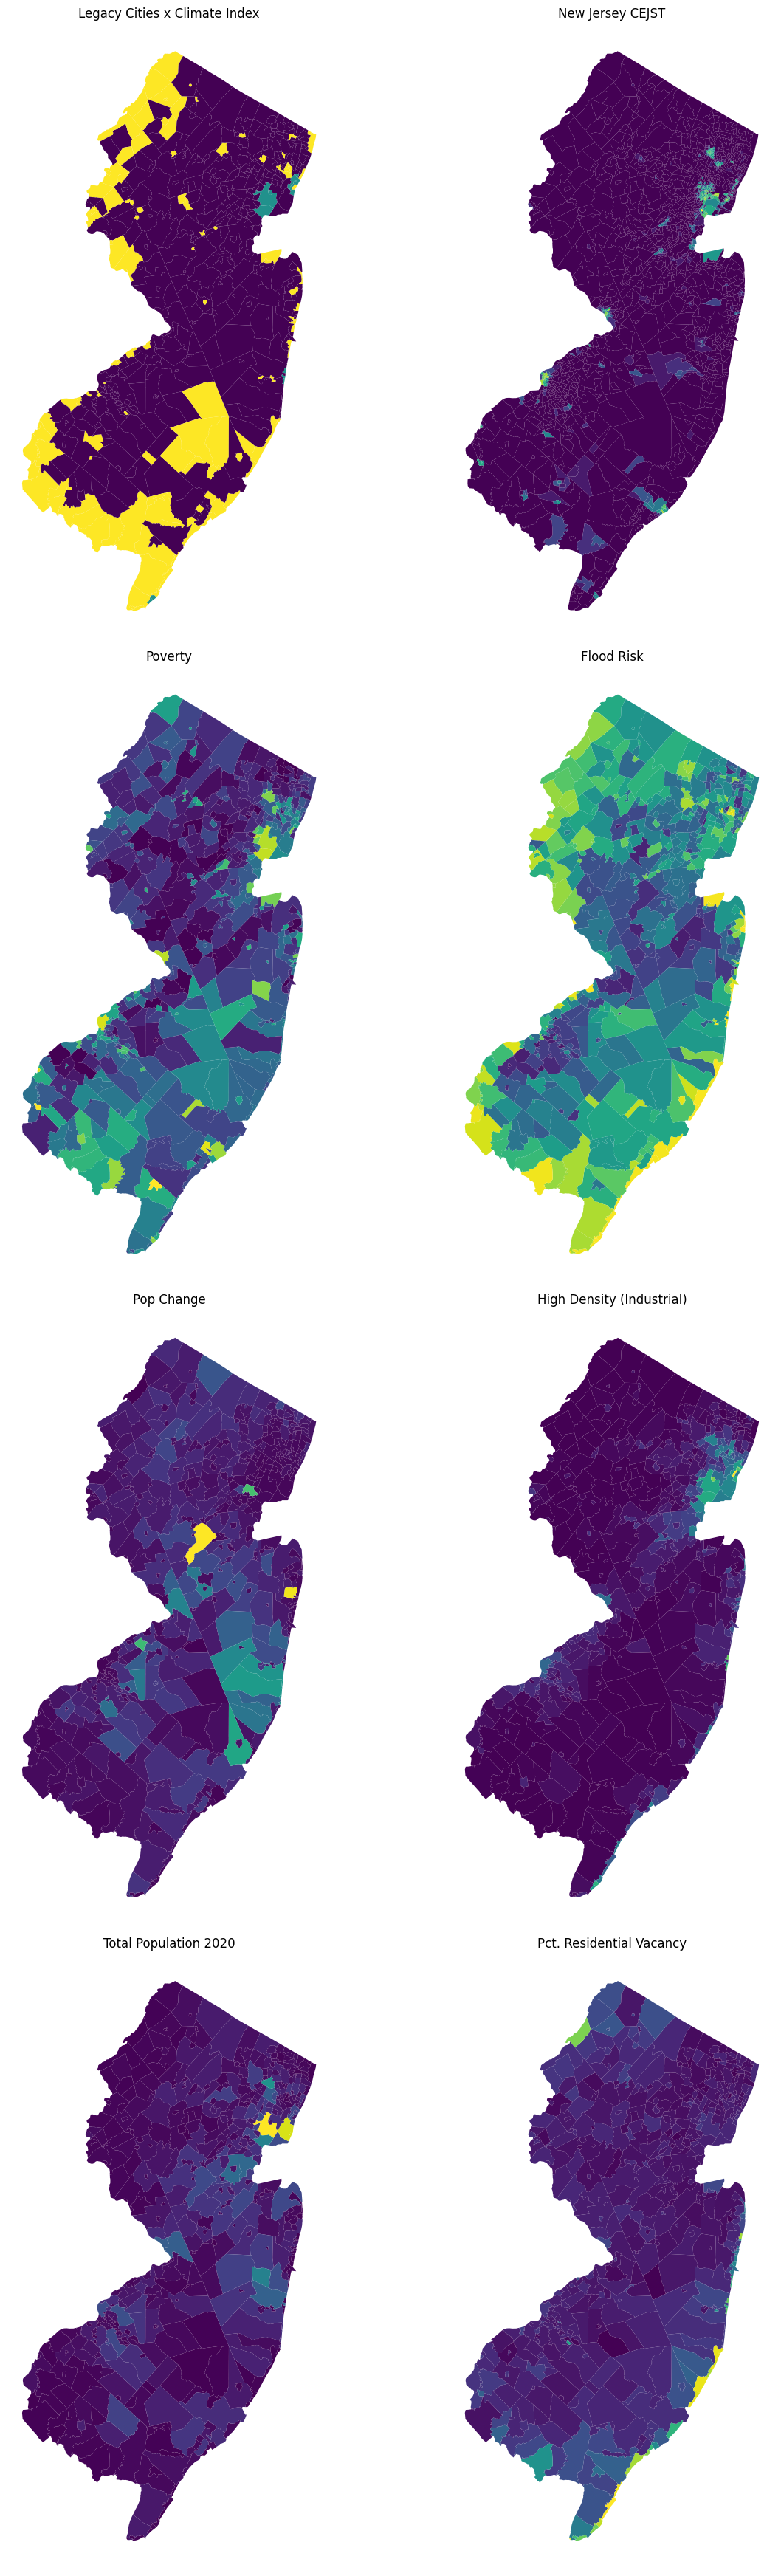

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Assuming retreat_index_gdf and nj_cest are previously defined GeoDataFrames

# Modify the highlight column to differentiate clusters 1 and 2
retreat_index_gdf['highlight'] = retreat_index_gdf['cluster'].apply(lambda x: 0 if x not in [1, 2] else (1 if x == 1 else 2))

# Generate colors for the highlight - pick from viridis
viridis = plt.cm.get_cmap('viridis', 3)  # Get 3 distinct colors from viridis
highlight_colors = [viridis.colors[0], viridis.colors[1], viridis.colors[2]]  # Pick colors for clusters 1, 2, and others
highlight_cmap = ListedColormap(highlight_colors)

# Set up a figure with two columns and 5 rows (since you'll have 9 plots)
fig, ax = plt.subplots(4, 2, figsize=(14, 35))  # Adjust size as needed

# Flatten the ax for easy indexing
ax = ax.flatten()

# Define a new colormap for your first plot if needed
viridis_half = plt.cm.viridis(np.linspace(0, 0.5, 256))
newcmp = LinearSegmentedColormap.from_list('HalfViridis', viridis_half)

# Plotting with the custom colormap for 'highlight'
retreat_index_gdf.plot(column='highlight', cmap=highlight_cmap, ax=ax[0], categorical=True)
ax[0].set_title('Legacy Cities x Climate Index')
ax[0].axis('off')

# Add other plots as before, adjusting ax indexing
# Example for the second plot
nj_cejst.plot(column='TC', cmap='viridis', ax=ax[1])
ax[1].set_title('New Jersey CEJST')
ax[1].axis('off')

# Plot for 'pov_rt' (3x3 position: 1,3)
retreat_index_gdf.plot(column='pov_rt', cmap='viridis', ax=ax[2])
ax[2].set_title('Poverty')
ax[2].axis('off')  # Remove axes and ticks

# Plot for 'flood_risk' (3x3 position: 2,1)
retreat_index_gdf.plot(column='flood_risk', cmap='viridis', ax=ax[3])
ax[3].set_title('Flood Risk')
ax[3].axis('off')  # Remove axes and ticks

# Plot for 'pct_70_year_pop_change' (3x3 position: 2,2)
retreat_index_gdf.plot(column='pct_70_year_pop_change', cmap='viridis', ax=ax[4])
ax[4].set_title('Pop Change')
ax[4].axis('off')  # Remove axes and ticks


# Plot for 'developed_high_intensity' (3x3 position: 2,3)
retreat_index_gdf.plot(column='developed_high_intensity', cmap='viridis', ax=ax[5])
ax[5].set_title('High Density (Industrial)')
ax[5].axis('off')  # Remove axes and ticks


# Plot for 'tot_pop_2020' (3x3 position: 3,1)
retreat_index_gdf.plot(column='tot_pop_2020', cmap='viridis', ax=ax[6])
ax[6].set_title('Total Population 2020')
ax[6].axis('off')  # Remove axes and ticks


# Plot for 'pct_res_vac' (3x3 position: 3,2)
cluster_dat.plot(column='pct_res_vac', cmap='viridis', ax=ax[7])
ax[7].set_title('Pct. Residential Vacancy')
ax[7].axis('off')  # Remove axes and ticks

# Adjust layout and show figure
plt.tight_layout()
plt.show()

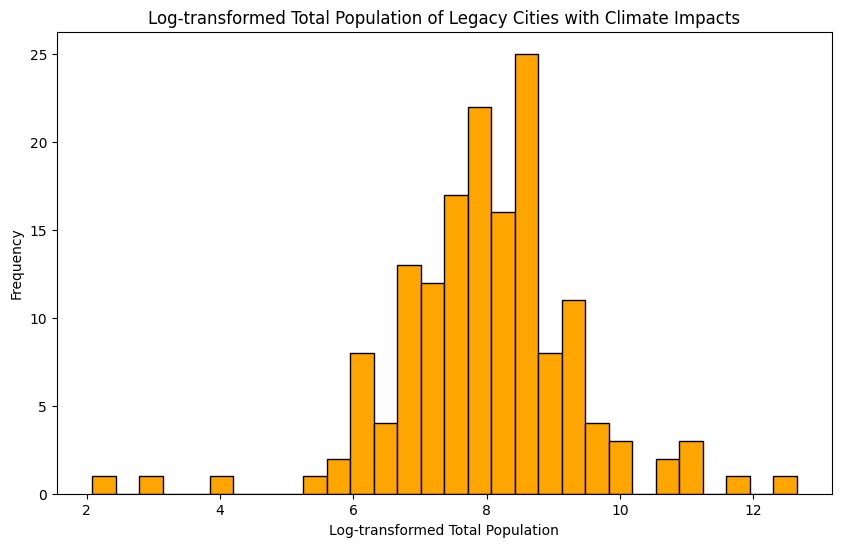

In [110]:
# add a histogram showing the total population of each municipality in the 'highlight' column
fig, ax = plt.subplots(figsize=(10, 6))

# Filter DataFrame for rows where 'highlight' is True, apply log transformation to 'tot_pop_2020', and plot histogram
np.log1p(retreat_index_gdf[retreat_index_gdf['highlight']]['tot_pop_2020']).plot.hist(ax=ax, bins=30, color='orange', edgecolor='black')
plt.xlabel('Log-transformed Total Population')
plt.ylabel('Frequency')
plt.title('Log-transformed Total Population of Legacy Cities with Climate Impacts')

plt.show()

In [112]:
# print out a list of the municipalities in the highlight column where the log-transformed total population is within 2 standard deviations of the mean
# Calculate the mean and standard deviation of the log-transformed total population
mean_log_pop = np.log1p(retreat_index_gdf['tot_pop_2020']).mean()
std_log_pop = np.log1p(retreat_index_gdf['tot_pop_2020']).std()

# Filter the DataFrame for rows where 'highlight' is True and the log-transformed total population is within 2 standard deviations of the mean
highlighted_municipalities = retreat_index_gdf[(retreat_index_gdf['highlight']) & (np.log1p(retreat_index_gdf['tot_pop_2020']) >= mean_log_pop - 2 * std_log_pop) & (np.log1p(retreat_index_gdf['tot_pop_2020']) <= mean_log_pop + 2 * std_log_pop)]

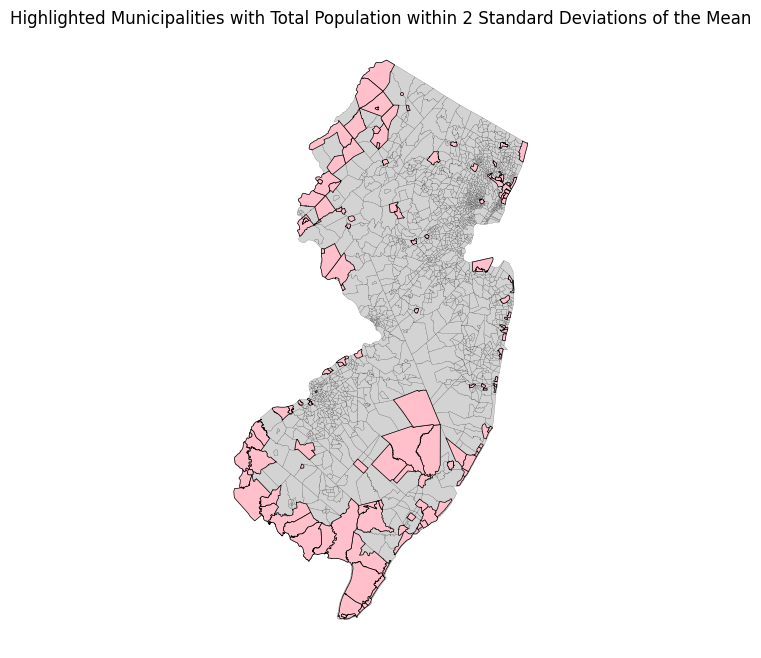

In [116]:
# plot the highlighted municipalities on a map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map
nj_cejst.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.1)

# Plot the highlighted municipalities
highlighted_municipalities.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.5)

# Add a title

plt.title('Highlighted Municipalities with Total Population within 2 Standard Deviations of the Mean')

# Remove the axis
ax.axis('off')

plt.show()